In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# scikit-learn 주요 모듈

*  sklearn.datasets : 내장 예제 데이터 세트
*  sklearn.preprocessing : 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등)
*  sklearn.feature_selection : 특징(feature)를 선택할 수 있는 기능 제공
*  sklearn.feature_extraction : 특징(feature) 추출에 사용

*  sklearn.decomposition : 차원 축소 관련 알고리즘 (PCA, NMF, Truncated SVD 등)
---
* sklearn.model_selection : 교차 검증을 위해 데이터를 학습/테스트 용으로 분리, 최적 파라미터를 탐색하는 API 제공 (GridSearch 등)  
* sklearn.metrics : 분류, 회귀, 클러스터링, Pairwise에 대한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등)

* sklearn.pipeline : 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 기능 제공

---

* sklearn.linear_mode : 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회위 등 회귀 관련 알고리즘과 SGD 알고리즘 제공

* sklearn.svm : 서포트 벡터 머신 알고리즘 제공
* sklearn.neighbors : 최근접 이웃 알고리즘 제공 (kNN 등)
* sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 등)
* sklearn.tree : 의사 결정 트리 알고리즘 제공
* sklearn.ensemble : 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등)
* sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (k-means, 계층형 클러스터링, DBSCAN 등)


---



(50,)
(50,)

(50, 1)
(50,)
model 가중치 : [2.00708833]
model 이건 뭐지 : 0.4311252297051915


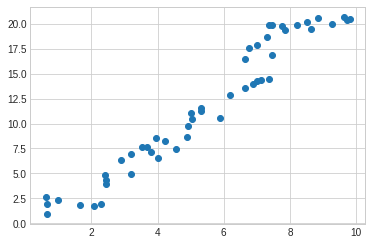

In [12]:
# Scikit-learn의 estimator API 사용 방법

# 0. 데이터 확인
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

bias = np.random.rand(50)
x = sorted(10 * np.random.rand(50)) + bias
y = 2 * x + np.random.rand(50)

plt.scatter(X,y);


# 1. 적절한 estimator 클래스를 import해서 클래스를 선택
from sklearn.linear_model import LinearRegression

# 2. 선택한 클래스를 인스턴스화 하여 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept= True)

# 3. 데이터를 특징 배열과 벡터로 배치
print(x.shape)
print(y.shape)
print()

X = x[:, np.newaxis]
print(X.shape)
print(y.shape)

# 4. 모델 인스턴스의 fit() 메서드를 호출해 데이터를 적합
model.fit(X,y)

print("model 가중치 : {}".format(model.coef_))
print("model 이건 뭐지 : {}".format(model.intercept_))

# 5. 모델을 테스트 데이터에 적용


# sklearn.model_selection 모듈

* train_test_split : 학습용 데이터와 테스트 데이터로 분리 가능
* cross validation을 위한 분할, 평가 기능 제공
* estimator의 하이퍼 파라미터 튜닝을 위한 함수와 클래스 제공


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# scikit learn 내장 데이터 사용
diabates = load_diabetes()

print(diabates.data.shape)
print(diabates.target.shape)

X_train, X_test, y_train, y_test = train_test_split(diabates.data, diabates.target, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print("Train data score : {}".format(model.score(X_train, y_train)))
print("Test data score : {}".format(model.score(X_test, y_test)))


(442, 10)
(442,)
Train data score : 0.5117823593509309
Test data score : 0.5239538832033795


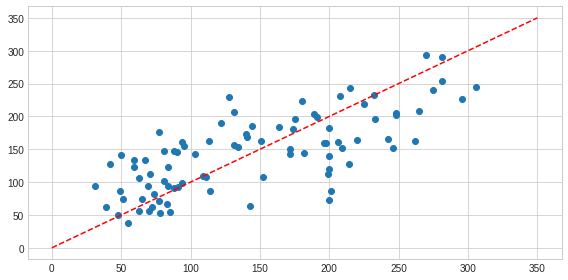

In [20]:
predicted = model.predict(X_test)
expected = y_test

plt.figure(figsize = (8,4))
plt.scatter(expected, predicted)
plt.plot([0,350],[0,350], '--r')
plt.tight_layout()

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate

# cv = cross validate 횟수
scores = cross_val_score(model, diabates.data, diabates.target, cv=5)

print("교차 검증 정확도 : {}".format(scores))
print("교차 검증 정확도 : {:.3f} + - {:.3f}".format(np.mean(scores),np.std(scores)))

교차 검증 정확도 : [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도 : 0.482 + - 0.049


GridSearchCV

* 여러개의 파라미터를 등록하고 모든 경우의 수를 탐색하여 최적 파라미터를 찾는 기능


In [32]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge : Alpha 값 조절 가능

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha = alpha)

Ridge_model = Ridge()
gs = GridSearchCV(estimator= Ridge_model, param_grid = param_grid, cv=5)

result = gs.fit(diabates.data, diabates.target)

print("best score : {}".format(result.best_score_))
print("best param : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

best score : 0.48230944185889035
best param : {'alpha': 0.001}
Ridge(alpha=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001487,0.000197,0.000885,0.000019,0.001,{'alpha': 0.001},0.428834,0.522145,0.484215,0.426941,0.549412,0.482309,0.049028,1
1,0.001698,0.000439,0.000872,0.000037,0.01,{'alpha': 0.01},0.424604,0.520049,0.489190,0.427839,0.545539,0.481444,0.048503,2
2,0.001490,0.000203,0.000863,0.000076,0.1,{'alpha': 0.1},0.411273,0.518475,0.492192,0.440448,0.537030,0.479884,0.047264,3
3,0.001464,0.000094,0.001007,0.000284,1,{'alpha': 1},0.321664,0.440484,0.422105,0.424664,0.441962,0.410176,0.044979,4
4,0.001443,0.000028,0.000902,0.000051,10,{'alpha': 10},0.068288,0.144052,0.155656,0.168142,0.155680,0.138364,0.035857,5
5,0.002659,0.001762,0.001923,0.001605,100,{'alpha': 100},-0.074872,-0.004493,0.020874,0.016252,0.019137,-0.004620,0.036291,6
6,0.001593,0.000120,0.000901,0.000019,1000,{'alpha': 1000},-0.095991,-0.025444,0.001689,-0.005784,-0.000112,-0.025128,0.036717,7


In [34]:
# multiprocessing을 이용한 GridSearchCV
# 병렬로 진행 가능

import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [ { 'penalty' : ['l1', 'l2'],
               'C' : [0.5, 1.0, 1.5, 1.8, 2.0, 2.5]} ]

gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 5, n_jobs = multiprocessing.cpu_count())   # n_jobs : 병렬 처리 하는 개수, multiprocessing.cpu_count() : 현재 cpu 만큼 병렬 처리를 함

result = gs.fit(iris.data, iris.target)


print("best score : {}".format(result.best_score_))
print("best param : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)




best score : 0.9733333333333334
best param : {'C': 1.0, 'penalty': 'l2'}
LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000335,0.000047,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.056454,0.005598,0.000606,0.000046,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,6
2,0.000316,0.000010,0.000000,0.000000,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.055674,0.005379,0.000605,0.000031,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,1
4,0.000334,0.000034,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.063501,0.010348,0.000985,0.000755,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,1
6,0.000340,0.000022,0.000000,0.000000,1.8,l1,"{'C': 1.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.060488,0.004995,0.000584,0.000032,1.8,l2,"{'C': 1.8, 'penalty': 'l2'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,1
8,0.000344,0.000013,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.066619,0.015351,0.000616,0.000032,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,1


# data preprocessing 

데이터 특징 스케일링(Scaling)

*   표준화 (Standardization) :
*   정규화 (Normalization) : 

In [50]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
scaled_iris = Standard_scaler.fit_transform(iris_df)  # fit 으로 표준화에 필요한 정보를 가져온 후, transform으로 실제 변환을 하는 함수 

scaled_iris_df = pd.DataFrame(data = scaled_iris, columns = iris.feature_names)
#scaled_iris_df.describe()

X_train, X_test, y_train, y_test = train_test_split(scaled_iris_df, iris.target, test_size = 0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train data score : {:.3f}".format(model.score(X_train, y_train)))
print("test data score : {:.3f}".format(model.score(X_test, y_test)))

train data score : 0.975
test data score : 0.967


In [52]:
from sklearn.preprocessing import MinMaxScaler

Normal_scaler = MinMaxScaler()
scaled_iris = Normal_scaler.fit_transform(iris_df)  

scaled_iris_df = pd.DataFrame(data = scaled_iris, columns = iris.feature_names)
#scaled_iris_df.describe()

X_train, X_test, y_train, y_test = train_test_split(scaled_iris_df, iris.target, test_size = 0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train data score : {:.3f}".format(model.score(X_train, y_train)))
print("test data score : {:.3f}".format(model.score(X_test, y_test)))

train data score : 0.917
test data score : 0.967


# 성능 평가 지표

정확도 (Accuracy)
*  accuracy_score 함수 제공
---

오차 행렬 (Confusion Matrix)
*  True Negative (TN) = 예측값이 Negative일 때, 실제 값이 Negative인 경우 (일치)
*  False Positive (FP) = 예측값이 Positive일 때, 실제 값이 Negative인 경우 (불일치)
*  False Negative (FN) = 예측값이 Negative일 때, 실제 값이 Positive인 경우 (불일치)
*  True Positive (TP) = 예측값이 Positive일 때, 실제 값이 Positive인 경우 (일치)
---

정밀도 (Precision) & 재현율 (Recall)
*   정밀도 = TP / (FP + TP)
*   재현율 = TP / (FN + TP)
*   정확도 = (TN + TP) / (TN + FP + FN + TP)
*   오류율 = (FN + FP) / (TN + FP + FN + TP)
---

F1 Score (F-measure)
*   정밀도와 재현율을 결합한 지표
*   어느 한쪽으로 치우치치 않을 때 높은 값을 가짐
*   F1 = 2 * ( Precision * recall ) / ( precision + recall )
---

ROC curve & AUC
*   ROC curve는 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)가 어떻게 변하는지 나타내는 곡선
*   TPR = TP / ( FN + TP )
*   TNR = TN / ( FP + TN )  a.k.a sensitivity
*   FPR = 1 - TNR

* AUC (Area Under Curve) 값은 ROC 곡선 아래의 면적을 구한 값 ( 1에 가까울 수록 좋은 모델)

In [53]:
# Accuracy sample

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# 임시로 데이터 만들기
X, y = make_classification(n_samples = 500, n_features = 2, n_informative=2, n_redundant=0, n_clusters_per_class= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train data score : {:.3f}".format(model.score(X_train, y_train)))
print("test data score : {:.3f}".format(model.score(X_test, y_test)))

predict = model.predict(X_test)
print("Accuracy : {:.3f}".format(accuracy_score(y_test, predict)))


train data score : 0.973
test data score : 0.960
Accuracy : 0.960


[[48  4]
 [ 0 48]]


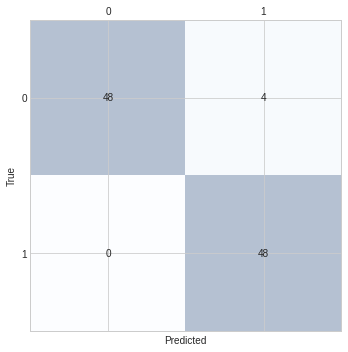

In [56]:
# Confusion matrix sample

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true = y_test, y_pred = predict)
print(conf_mat)

fig, ax = plt.subplots(figsize = (5,5))

ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
  for j in range(conf_mat.shape[1]):
    ax.text(x = j, y = i, s = conf_mat[i,j], va = 'center', ha = 'center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [57]:
# Precision Recal sample

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print("Precision : {:.3f}".format(precision))
print("Recall : {:.3f}".format(recall))


Precision : 0.923
Recall : 1.000


In [58]:
# F1 Score sample

from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)

print("F1 score : {:.3f}".format(f1))


F1 score : 0.960


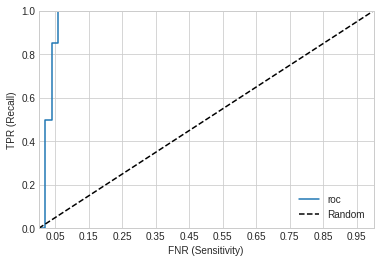

In [60]:
# ROC curve & AUC sample

from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:,1]  # 클래스가 1인 것에 대한 확률 값을 계산

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fpr, tpr, label = 'roc')
plt.plot([0,1], [0,1], '--k', label = 'Random')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FNR (Sensitivity)')
plt.ylabel('TPR (Recall)')
plt.legend()

# curve와 점선과 거리가 멀수록 성능이 좋음

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print("ROC AUC score : {:.3f}".format(roc_auc))

ROC AUC score : 0.962
